In [2]:
from idaes.surrogate.pysmo import radial_basis_function
from scipy.interpolate import griddata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl

# Data

## Loading

In [3]:
df_sigma_data = pd.read_excel("data/flexural_strength_data.xlsx", sheet_name='D_1-3') # D_1 D_1-2 D_1-3
df_sigma_data.head()

,K2SiO3,KOH,H2O,sigma_f
0,6,12,6.2,3.92
1,6,18,3.8,4.13
2,6,24,1.4,3.56
3,9,12,3.2,8.60
4,9,24,0.0,8.10


In [4]:
sigma_data = df_sigma_data.to_numpy()
sigma_data

array([[ 6.  , 12.  ,  6.2 ,  3.92],
       [ 6.  , 18.  ,  3.8 ,  4.13],
       [ 6.  , 24.  ,  1.4 ,  3.56],
       [ 9.  , 12.  ,  3.2 ,  8.6 ],
       [ 9.  , 24.  ,  0.  ,  8.1 ],
       [12.  , 12.  ,  0.  ,  7.87],
       [12.  , 18.  ,  0.  , 14.49],
       [12.  , 24.  ,  0.  , 10.48],
       [ 9.  ,  9.  ,  5.6 ,  9.77],
       [12.  ,  9.  ,  3.8 ,  8.24],
       [15.  ,  9.  ,  2.  ,  8.63],
       [ 9.  , 12.  ,  2.6 , 13.72],
       [12.  , 12.  ,  0.8 , 12.28],
       [15.  , 12.  ,  0.  , 12.42],
       [12.  , 15.  ,  0.  , 11.3 ],
       [15.  , 15.  ,  0.  ,  8.53],
       [ 5.  , 12.  ,  5.6 , 14.03],
       [ 5.  , 15.  ,  3.8 , 13.33],
       [ 5.  , 18.  ,  2.  , 10.93],
       [ 7.  , 12.  ,  2.6 , 18.76],
       [ 7.  , 15.  ,  0.8 , 17.67],
       [ 7.  , 18.  ,  0.  , 16.95],
       [ 9.  , 12.  ,  0.  , 27.83],
       [ 9.  , 15.  ,  0.  , 19.85],
       [ 9.  , 18.  ,  0.  , 17.73],
       [ 7.  , 12.  ,  0.  , 11.71]])

In [5]:
df_curingtime_data = pd.read_excel("data/curing_time_data.xlsx", sheet_name='D_2-3') # D_2 D_3 D_2-3
df_curingtime_data.head()

,K2SiO3,KOH,H2O,Curing time
0,9,9,5.6,21
1,12,9,3.8,40
2,9,12,2.6,19
3,12,12,0.8,32
4,12,15,0.0,44


In [6]:
curingtime_data = df_curingtime_data.to_numpy()
curingtime_data

array([[ 9. ,  9. ,  5.6, 21. ],
       [12. ,  9. ,  3.8, 40. ],
       [ 9. , 12. ,  2.6, 19. ],
       [12. , 12. ,  0.8, 32. ],
       [12. , 15. ,  0. , 44. ],
       [15. , 15. ,  0. , 50. ],
       [ 5. , 12. ,  5.6, 12. ],
       [ 5. , 15. ,  3.8, 24. ],
       [ 5. , 18. ,  2. , 60. ],
       [ 7. , 12. ,  2.6,  9. ],
       [ 7. , 15. ,  0.8, 20. ],
       [ 7. , 18. ,  0. , 45. ],
       [ 9. , 12. ,  0. ,  7. ],
       [ 9. , 18. ,  0. , 43. ],
       [ 7. , 12. ,  0. , 52. ],
       [ 5. ,  9. ,  9. , 47. ]])

## Convert to weight ratio

In [7]:
def convert_to_weight_ratio(data):
    data.transpose()[0][:] = data.transpose()[0][:]/20
    data.transpose()[1][:] = data.transpose()[1][:]/20
    data.transpose()[2][:] = data.transpose()[2][:]/20

In [8]:
convert_to_weight_ratio(sigma_data)

In [9]:
convert_to_weight_ratio(curingtime_data)

# Radial Basis Function (RBF)

## Model definition and training

In [10]:
rbf_model_sigma = radial_basis_function.RadialBasisFunctions(XY_data=sigma_data, basis_function='gaussian', regularization=False)
rbf_model_sigma.training()


Default parameter estimation method is used.

Parameter estimation method:  algebraic
Basis function:  gaussian
Regularization done:  False
0.001    |     0    |     5369.651990198227    |     3.462539446915354e+18    |     768.8382035276562    |     3.462539446915354e+18    |     768.8382035276562
0.002    |     0    |     187554.9880500134    |     6.721962209603487e+18    |     1492.5754431523967    |     6.721962209603487e+18    |     1492.5754431523967
0.005    |     0    |     25596250.99401337    |     2.1250303445594327e+18    |     471.8515233114024    |     2.1250303445594327e+18    |     471.8515233114024
0.0075    |     0    |     14896130.967030691    |     2.361373673603541e+18    |     524.3302844356681    |     2.361373673603541e+18    |     524.3302844356681
0.01    |     0    |     25978.59583686589    |     2.1882274832348431e+18    |     485.8841070009763    |     2.1882274832348431e+18    |     485.8841070009763
0.02    |     0    |     4388.5393972628035    |    


Results of radial basis function run:

Basis function type               : gaussian
Shape parameter                    : 5.0
Regularization parameter           : 0.0
Number of terms in RBF model       : 27

RBF Expression:
--------------------------

3.56 + 24.27*(-0.40327832260566415*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.09999999999999998)**2 + ((IndexedParam[1] - 0.45)/0.75 - 0.19999999999999996)**2 + (IndexedParam[2]/0.31 - 1.0)**2)**0.5)**2) - 0.11139862878846808*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.09999999999999998)**2 + ((IndexedParam[1] - 0.45)/0.75 - 0.6)**2 + (IndexedParam[2]/0.31 - 0.6129032258064516)**2)**0.5)**2) - 0.008866291264113644*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.09999999999999998)**2 + ((IndexedParam[1] - 0.45)/0.75 - 1.0)**2 + (IndexedParam[2]/0.31 - 0.2258064516129032)**2)**0.5)**2) - 0.30950732435132955*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.4)**2 + ((IndexedParam[1] - 0.45)/0.75 - 0.19999999999999996)**2 + (IndexedParam[2]/0.

In [11]:
rbf_model_curingtime = radial_basis_function.RadialBasisFunctions(XY_data=curingtime_data, basis_function='mq', regularization=False)
rbf_model_curingtime.training()


Default parameter estimation method is used.

Parameter estimation method:  algebraic
Basis function:  mq
Regularization done:  False
0.001    |     0    |     24241.04842734541    |     1.6426864154203436e+18    |     364.74965612772604    |     1.6426864154203436e+18    |     364.74965612772604
0.002    |     0    |     19721.81152742805    |     4.349466852124352e+17    |     96.57756488144713    |     4.349466852124352e+17    |     96.57756488144713
0.005    |     0    |     51975.71937036923    |     3.324365371681535e+17    |     73.81573955814812    |     3.324365371681535e+17    |     73.81573955814812
0.0075    |     0    |     536199.3916404896    |     3.300868696585667e+17    |     73.29400856427675    |     3.300868696585667e+17    |     73.29400856427675
0.01    |     0    |     3678.772438498925    |     8.764030347577587e+16    |     19.4600565607885    |     8.764030347577587e+16    |     19.4600565607885
0.02    |     0    |     24.26549069426578    |     31911987706


Results of radial basis function run:

Basis function type               : mq
Shape parameter                    : 1000.0
Regularization parameter           : 0.0
Number of terms in RBF model       : 17

RBF Expression:
--------------------------

7.0 + 53.0*(0.0005459215113391044*(((((IndexedParam[0] - 0.25)/0.5 - 0.4)**2 + ((IndexedParam[1] - 0.45)/0.45)**2 + (IndexedParam[2]/0.45 - 0.6222222222222221)**2)**0.5*1000.0)**2 + 1)**0.5 - 0.00034309088127199385*(((((IndexedParam[0] - 0.25)/0.5 - 0.7)**2 + ((IndexedParam[1] - 0.45)/0.45)**2 + (IndexedParam[2]/0.45 - 0.4222222222222222)**2)**0.5*1000.0)**2 + 1)**0.5 - 0.0006749591725148924*(((((IndexedParam[0] - 0.25)/0.5 - 0.4)**2 + ((IndexedParam[1] - 0.45)/0.45 - 0.33333333333333326)**2 + (IndexedParam[2]/0.45 - 0.2888888888888889)**2)**0.5*1000.0)**2 + 1)**0.5 - 0.00024009572015400312*(((((IndexedParam[0] - 0.25)/0.5 - 0.7)**2 + ((IndexedParam[1] - 0.45)/0.45 - 0.33333333333333326)**2 + (IndexedParam[2]/0.45 - 0.08888888888888889)**2)*

## Mathematical expressions of the model

In [12]:
def mathmatical_expressions(model):
    vars = model.get_feature_vector()

    list_vars = []
    for i in vars.keys():
        list_vars.append(vars[i])

    print(model.generate_expression(list_vars))

In [13]:
mathmatical_expressions(rbf_model_sigma)

3.56 + 24.27*(-0.40327832260566415*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.09999999999999998)**2 + ((IndexedParam[1] - 0.45)/0.75 - 0.19999999999999996)**2 + (IndexedParam[2]/0.31 - 1.0)**2)**0.5)**2) - 0.11139862878846808*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.09999999999999998)**2 + ((IndexedParam[1] - 0.45)/0.75 - 0.6)**2 + (IndexedParam[2]/0.31 - 0.6129032258064516)**2)**0.5)**2) - 0.008866291264113644*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.09999999999999998)**2 + ((IndexedParam[1] - 0.45)/0.75 - 1.0)**2 + (IndexedParam[2]/0.31 - 0.2258064516129032)**2)**0.5)**2) - 0.30950732435132955*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.4)**2 + ((IndexedParam[1] - 0.45)/0.75 - 0.19999999999999996)**2 + (IndexedParam[2]/0.31 - 0.5161290322580645)**2)**0.5)**2) + 0.15029069937909328*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.4)**2 + ((IndexedParam[1] - 0.45)/0.75 - 1.0)**2 + (IndexedParam[2]/0.31)**2)**0.5)**2) - 0.29061786405807843*exp(- (5.0*(((IndexedParam[0] - 0.2

In [14]:
mathmatical_expressions(rbf_model_curingtime)

7.0 + 53.0*(0.0005459215113391044*(((((IndexedParam[0] - 0.25)/0.5 - 0.4)**2 + ((IndexedParam[1] - 0.45)/0.45)**2 + (IndexedParam[2]/0.45 - 0.6222222222222221)**2)**0.5*1000.0)**2 + 1)**0.5 - 0.00034309088127199385*(((((IndexedParam[0] - 0.25)/0.5 - 0.7)**2 + ((IndexedParam[1] - 0.45)/0.45)**2 + (IndexedParam[2]/0.45 - 0.4222222222222222)**2)**0.5*1000.0)**2 + 1)**0.5 - 0.0006749591725148924*(((((IndexedParam[0] - 0.25)/0.5 - 0.4)**2 + ((IndexedParam[1] - 0.45)/0.45 - 0.33333333333333326)**2 + (IndexedParam[2]/0.45 - 0.2888888888888889)**2)**0.5*1000.0)**2 + 1)**0.5 - 0.00024009572015400312*(((((IndexedParam[0] - 0.25)/0.5 - 0.7)**2 + ((IndexedParam[1] - 0.45)/0.45 - 0.33333333333333326)**2 + (IndexedParam[2]/0.45 - 0.08888888888888889)**2)**0.5*1000.0)**2 + 1)**0.5 - 0.0006395392531980506*(((((IndexedParam[0] - 0.25)/0.5 - 0.7)**2 + ((IndexedParam[1] - 0.45)/0.45 - 0.6666666666666666)**2 + (IndexedParam[2]/0.45)**2)**0.5*1000.0)**2 + 1)**0.5 + 0.00027597711635750897*(((((IndexedParam[

## Single-point prediction

In [15]:
def single_point_prediction(model, single_point):
    unsampled_points = np.array(single_point)
    ys = model.predict_output(unsampled_points)
    print(ys)

In [16]:
single_point_prediction(rbf_model_sigma, [[0.45, 0.6, 0]])

[[27.83]]


In [17]:
single_point_prediction(rbf_model_curingtime, [[0.45, 0.6, 0]])

[[7.]]


## Visualization

In [18]:
def generate_3d_grid_data(model, data):
    
    x1 = np.linspace(data.transpose()[0].min(), data.transpose()[0].max(), 100)
    x2 = np.linspace(data.transpose()[1].min(), data.transpose()[1].max(), 100)
    x3 = np.linspace(data.transpose()[2].min(), data.transpose()[2].max(), 100)

    x1, x2, x3 = np.meshgrid(x1, x2, x3)

    x1_list = []
    x2_list = []
    x3_list = []

    for i in range(x1.shape[0]):
        for j in range(x1.shape[0]):
            for k in range(x1.shape[0]):
    #             print(x1[i][j][k], x2[i][j][k], x3[i][j][k])
                x1_list.append(x1[i][j][k])
                x2_list.append(x2[i][j][k])
                x3_list.append(x3[i][j][k])
                
    x_123 = np.array(list(zip(x1_list, x2_list, x3_list)))
    y = model.predict_output(x_123)
    xy = np.concatenate([x_123, y], 1) 
    
    df_xy = pd.DataFrame(xy, columns = ['x1','x2','x3', 'y'])
    df_xy = df_xy.loc[df_xy.x3==0.0].copy() # Applying the condition where H2O is zero

    x1 = df_xy['x1']
    x2 = df_xy['x2']
    x3 = df_xy['x3']
    y = df_xy['y']

    grid_x1, grid_x2 = np.mgrid[x1.min():x1.max():1000j, x2.min():x2.max():1000j]

    points = np.column_stack((x1,x2))
    values = df_xy['y']

    zi = griddata(points, values, (grid_x1, grid_x2), method='cubic') #cubic, linear
    
    return grid_x1, grid_x2, zi

In [19]:
grid_x1_sigma, grid_x2_sigma, zi_sigma = generate_3d_grid_data(rbf_model_sigma, sigma_data)

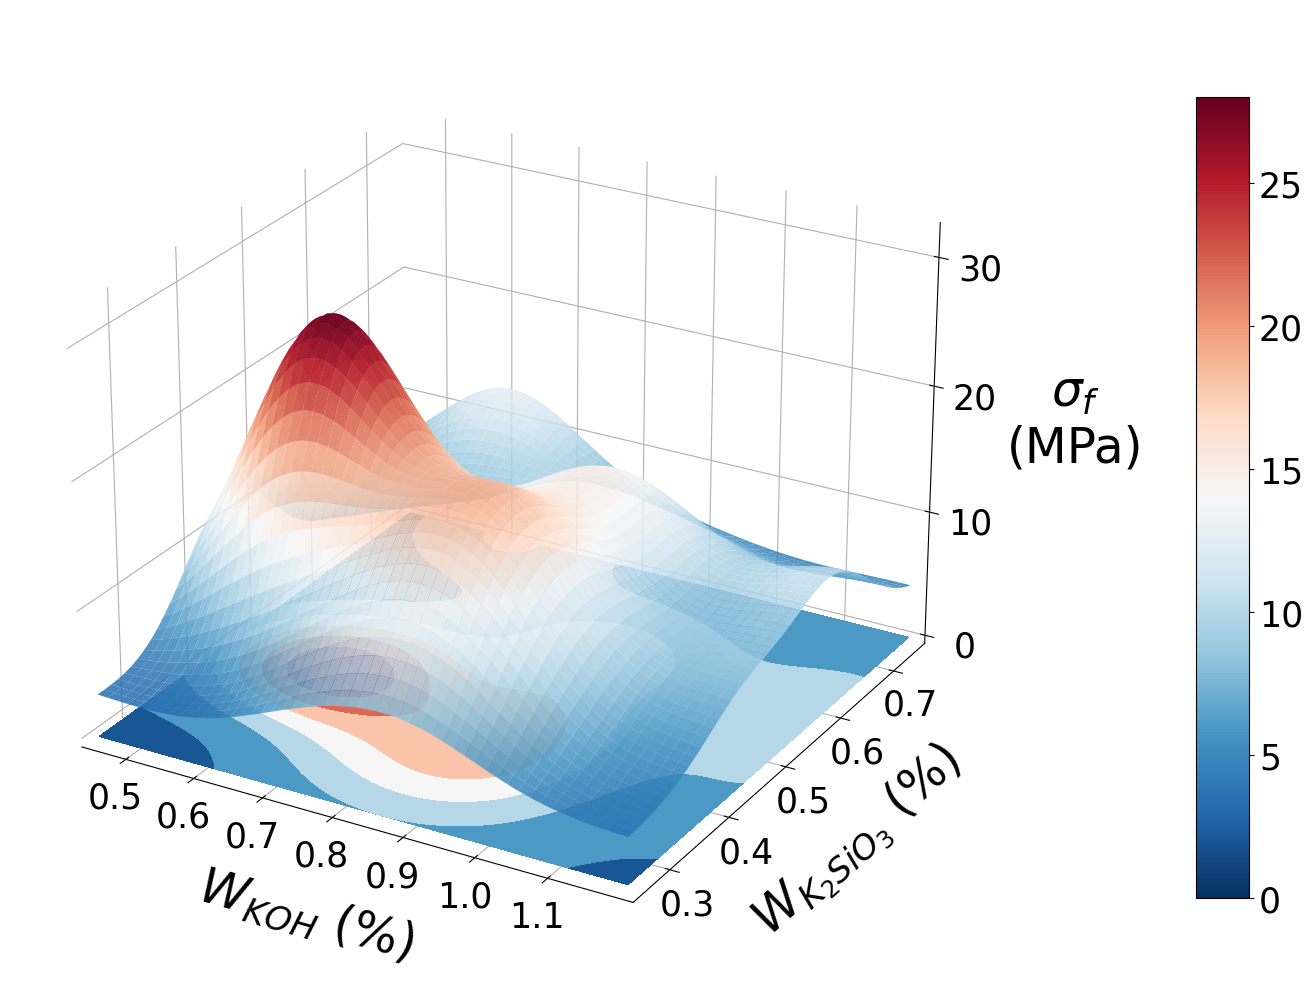

In [21]:
# Figure
fig = plt.figure(figsize=(18,13))
ax = plt.axes(projection='3d', computed_zorder=False)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

vmin = 0
vmax = 28
cmap = "RdBu_r"

# color bar
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, shrink=0.8, aspect=15, pad = 0.15)

#plot
ax.plot_surface(grid_x2_sigma, grid_x1_sigma, zi_sigma, cmap=cmap, vmin=vmin, vmax=vmax, linewidth=0, alpha=.85, zorder=-1)
ax.contourf(grid_x2_sigma, grid_x1_sigma, zi_sigma, zdir='z', offset=0, cmap=cmap, vmin=vmin, vmax=vmax, zorder=-3)

plt.xlim([0.45, 1.2])
plt.xticks(np.arange(0.5, 1.2, 0.1))
plt.ylim([0.25, 0.75])
plt.yticks(np.arange(0.3, 0.75, 0.1))
ax.set_zlim(0,32)
ax.set_zticks(np.arange(0, 31, 10))
ax.tick_params(axis='z', which='major', pad=10)

plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)

ax.set_xlabel("$W_{KOH}$ (%)", fontsize=35, labelpad=27)
ax.set_ylabel("$W_{K_2SiO_3}$ (%)", fontsize=35, labelpad=27)

ax.zaxis.set_rotate_label(False) 
ax.set_zlabel("$\sigma_f$\n(MPa)", fontsize=35, rotation = 0, labelpad=43)

ax.view_init(25,-60)

fig.savefig("sigma",bbox_inches='tight', dpi= 300)

plt.show()

In [22]:
grid_x1_curingtime, grid_x2_curingtime, zi_curingtime = generate_3d_grid_data(rbf_model_curingtime, curingtime_data)

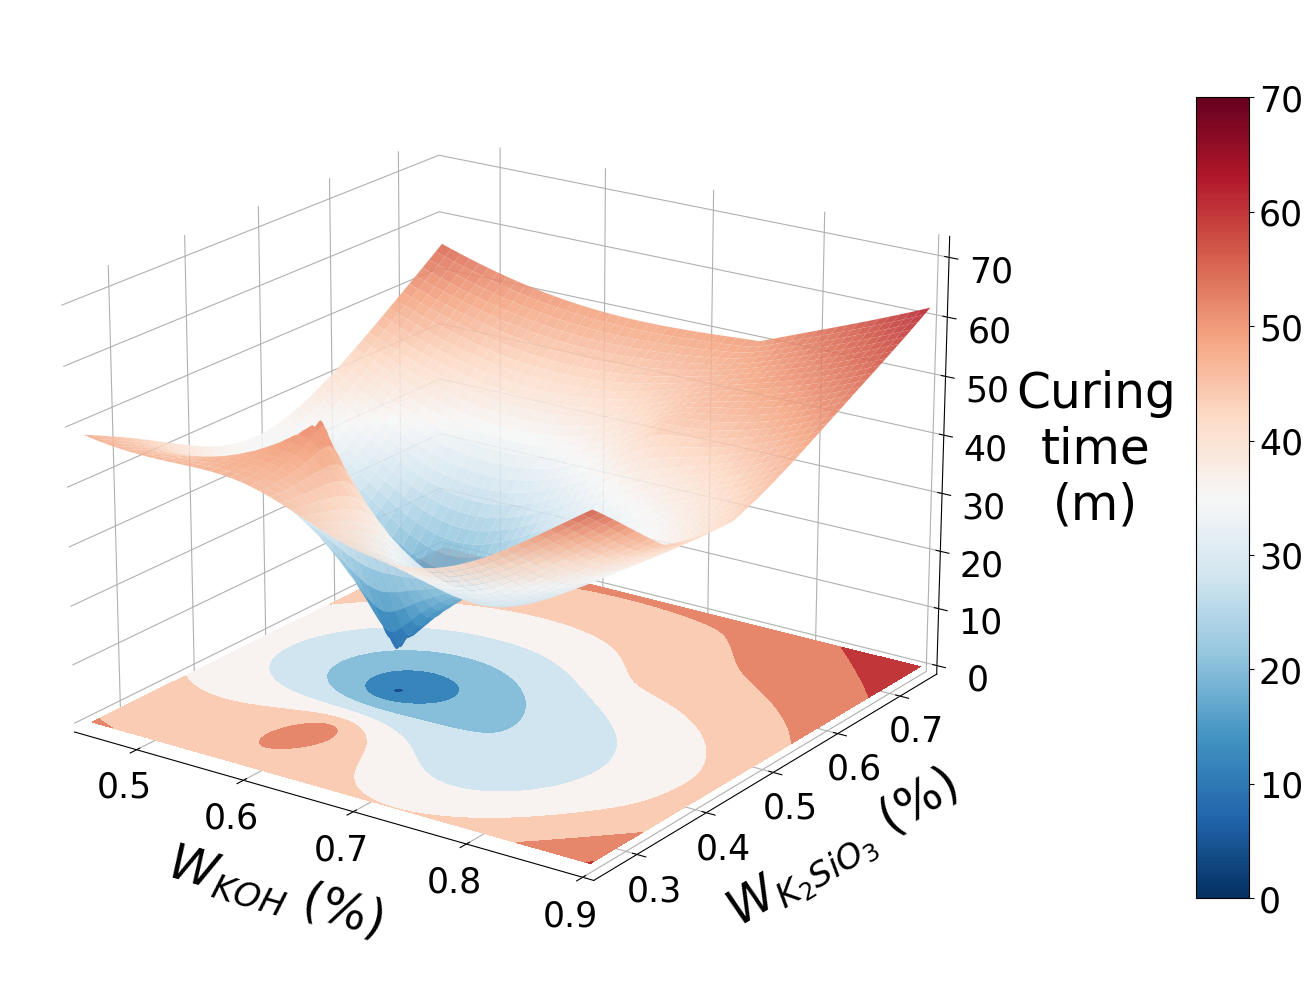

In [23]:
# Figure
fig = plt.figure(figsize=(18,13))
ax = plt.axes(projection='3d', computed_zorder=False)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

vmin = 0
vmax = 70
cmap = "RdBu_r"

# 컬러바
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, shrink=0.8, aspect=15, pad = 0.15)

ax.plot_surface(grid_x2_curingtime, grid_x1_curingtime, zi_curingtime, cmap=cmap, vmin=vmin, vmax=vmax, linewidth=0, alpha=.9, zorder=-1)
ax.contourf(grid_x2_curingtime, grid_x1_curingtime, zi_curingtime, zdir='z', offset=0, cmap=cmap, vmin=vmin, vmax=vmax, zorder=-2)

plt.xlim([0.45, 0.9])
plt.xticks(np.arange(0.5, 1, 0.1))
plt.ylim([0.25, 0.75])
plt.yticks(np.arange(0.3, 0.75, 0.1))
ax.set_zlim(0,72)
ax.set_zticks(np.arange(0, 71, 10))
ax.tick_params(axis='z', which='major', pad=10)  

plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)

ax.set_xlabel("$W_{KOH}$ (%)", fontsize=35, labelpad=27)
ax.set_ylabel("$W_{K_2SiO_3}$ (%)", fontsize=35, labelpad=27)

ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('Curing\ntime\n(m)', fontsize=35, rotation = 0, labelpad=45)

ax.view_init(20,-55)

fig.savefig("Curing_time",bbox_inches='tight', dpi= 300)

plt.show()

# Model evaluation

## Parity plot

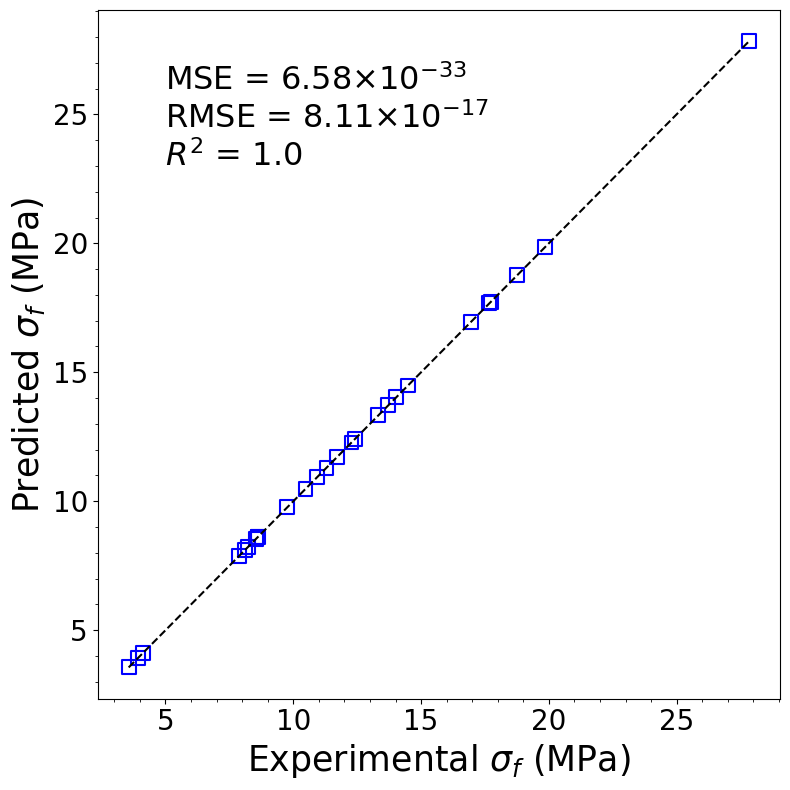

R2:  1.0 
RMSE:  8.11370363604921e-17


In [24]:
fig1 = plt.figure(figsize=(8, 8), tight_layout=True)

ax = fig1.add_subplot()
ax.plot([rbf_model_sigma.y_data_unscaled.min(),rbf_model_sigma.y_data_unscaled.max()], [rbf_model_sigma.y_data_unscaled.min(),rbf_model_sigma.y_data_unscaled.max()], '--', color='k') 
ax.scatter(rbf_model_sigma.y_data_unscaled, rbf_model_sigma.output_predictions, marker='s', s=100, facecolors='none', edgecolors='b',linewidths=1.5)

mybox={'facecolor':'w','edgecolor':'gray','boxstyle':'round','alpha':0.9}
ax.text(5, 23,'MSE = 6.58×$10^{-33}$\nRMSE = 8.11×$10^{-17}$\n$R^2$ = 1.0', fontsize=23, color='black')

ax.set_xlabel('Experimental $\sigma_f$ (MPa)', fontsize=25)
ax.set_ylabel('Predicted $\sigma_f$ (MPa)', fontsize=25)
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.minorticks_on()

plt.savefig("parity plot sigma",bbox_inches='tight', dpi= 300)

plt.show()

print('R2: ', rbf_model_sigma.R2, '\nRMSE: ', rbf_model_sigma.rmse)

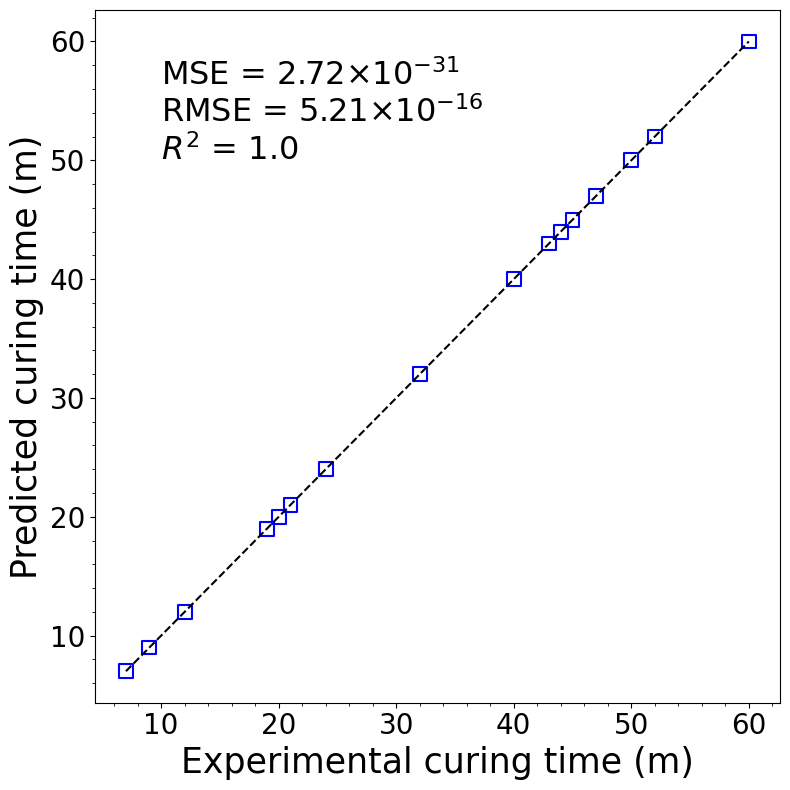

R2:  1.0 
RMSE:  5.2141355471458665e-16


In [25]:
fig1 = plt.figure(figsize=(8, 8), tight_layout=True)

ax = fig1.add_subplot()
ax.plot([rbf_model_curingtime.y_data_unscaled.min(),rbf_model_curingtime.y_data_unscaled.max()], [rbf_model_curingtime.y_data_unscaled.min(),rbf_model_curingtime.y_data_unscaled.max()], '--', color='k') 
ax.scatter(rbf_model_curingtime.y_data_unscaled, rbf_model_curingtime.output_predictions, marker='s', s=100, facecolors='none', edgecolors='b',linewidths=1.5)

mybox={'facecolor':'w','edgecolor':'gray','boxstyle':'round','alpha':0.9}
ax.text(10, 50,'MSE = 2.72×$10^{-31}$\nRMSE = 5.21×$10^{-16}$\n$R^2$ = 1.0', fontsize=23, color='black')

ax.set_xlabel('Experimental curing time (m)', fontsize=25)
ax.set_ylabel('Predicted curing time (m)', fontsize=25)
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.minorticks_on()

plt.savefig("parity plot curingtime",bbox_inches='tight', dpi= 300)

plt.show()

print('R2: ', rbf_model_curingtime.R2, '\nRMSE: ', rbf_model_curingtime.rmse)

## Model report

In [26]:
rbf_model_sigma.print_report()


Results of radial basis function run:

Basis function type               : gaussian
Shape parameter                    : 5.0
Regularization parameter           : 0.0
Number of terms in RBF model       : 27

RBF Expression:
--------------------------

3.56 + 24.27*(-0.40327832260566415*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.09999999999999998)**2 + ((IndexedParam[1] - 0.45)/0.75 - 0.19999999999999996)**2 + (IndexedParam[2]/0.31 - 1.0)**2)**0.5)**2) - 0.11139862878846808*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.09999999999999998)**2 + ((IndexedParam[1] - 0.45)/0.75 - 0.6)**2 + (IndexedParam[2]/0.31 - 0.6129032258064516)**2)**0.5)**2) - 0.008866291264113644*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.09999999999999998)**2 + ((IndexedParam[1] - 0.45)/0.75 - 1.0)**2 + (IndexedParam[2]/0.31 - 0.2258064516129032)**2)**0.5)**2) - 0.30950732435132955*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.4)**2 + ((IndexedParam[1] - 0.45)/0.75 - 0.19999999999999996)**2 + (IndexedParam[2]/0.

In [27]:
rbf_model_sigma.leave_one_out_crossvalidation()

0.001    |     0    |     5369.651990198227    |     3.462539446915354e+18    |     768.8382035276562    |     3.462539446915354e+18    |     768.8382035276562
0.002    |     0    |     187554.9880500134    |     6.721962209603487e+18    |     1492.5754431523967    |     6.721962209603487e+18    |     1492.5754431523967
0.005    |     0    |     25596250.99401337    |     2.1250303445594327e+18    |     471.8515233114024    |     2.1250303445594327e+18    |     471.8515233114024
0.0075    |     0    |     14896130.967030691    |     2.361373673603541e+18    |     524.3302844356681    |     2.361373673603541e+18    |     524.3302844356681
0.01    |     0    |     25978.59583686589    |     2.1882274832348431e+18    |     485.8841070009763    |     2.1882274832348431e+18    |     485.8841070009763
0.02    |     0    |     4388.5393972628035    |     8.311273475904038e+17    |     184.5473435381004    |     8.311273475904038e+17    |     184.5473435381004
0.05    |     0    |     1061.452

(5.0, 0.0, 1.3809929885596939)

In [28]:
rbf_model_curingtime.print_report()


Results of radial basis function run:

Basis function type               : mq
Shape parameter                    : 1000.0
Regularization parameter           : 0.0
Number of terms in RBF model       : 17

RBF Expression:
--------------------------

7.0 + 53.0*(0.0005459215113391044*(((((IndexedParam[0] - 0.25)/0.5 - 0.4)**2 + ((IndexedParam[1] - 0.45)/0.45)**2 + (IndexedParam[2]/0.45 - 0.6222222222222221)**2)**0.5*1000.0)**2 + 1)**0.5 - 0.00034309088127199385*(((((IndexedParam[0] - 0.25)/0.5 - 0.7)**2 + ((IndexedParam[1] - 0.45)/0.45)**2 + (IndexedParam[2]/0.45 - 0.4222222222222222)**2)**0.5*1000.0)**2 + 1)**0.5 - 0.0006749591725148924*(((((IndexedParam[0] - 0.25)/0.5 - 0.4)**2 + ((IndexedParam[1] - 0.45)/0.45 - 0.33333333333333326)**2 + (IndexedParam[2]/0.45 - 0.2888888888888889)**2)**0.5*1000.0)**2 + 1)**0.5 - 0.00024009572015400312*(((((IndexedParam[0] - 0.25)/0.5 - 0.7)**2 + ((IndexedParam[1] - 0.45)/0.45 - 0.33333333333333326)**2 + (IndexedParam[2]/0.45 - 0.08888888888888889)**2)*

In [29]:
rbf_model_curingtime.leave_one_out_crossvalidation()

0.001    |     0    |     24241.04842734541    |     1.6426864154203436e+18    |     364.74965612772604    |     1.6426864154203436e+18    |     364.74965612772604
0.002    |     0    |     19721.81152742805    |     4.349466852124352e+17    |     96.57756488144713    |     4.349466852124352e+17    |     96.57756488144713
0.005    |     0    |     51975.71937036923    |     3.324365371681535e+17    |     73.81573955814812    |     3.324365371681535e+17    |     73.81573955814812
0.0075    |     0    |     536199.3916404896    |     3.300868696585667e+17    |     73.29400856427675    |     3.300868696585667e+17    |     73.29400856427675
0.01    |     0    |     3678.772438498925    |     8.764030347577587e+16    |     19.4600565607885    |     8.764030347577587e+16    |     19.4600565607885
0.02    |     0    |     24.26549069426578    |     3191198770697099.5    |     0.708588470276683    |     3191198770697099.5    |     0.708588470276683
0.05    |     0    |     2.888308728051757   

(1000.0, 0.0, 1.2496315623863243)

In [30]:
# model.pickle_load('solution_v_06-30-22_184050.pickle')